In [1]:
from pathlib import Path
import re

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown


In [2]:
PLOTS_DIR = Path("sarimax_plots_best")  # change if needed, e.g. Path.home() / "Desktop/..." / "sarimax_plots"
assert PLOTS_DIR.exists(), f"Folder not found: {PLOTS_DIR.resolve()}"

cluster_re = re.compile(r"^cluster_(\d+)_")

clusters = sorted({
    int(cluster_re.match(p.name).group(1))
    for p in PLOTS_DIR.iterdir()
    if p.is_file() and cluster_re.match(p.name)
})

clusters


[3, 7, 8]

In [3]:
def show_cluster(cluster_id: int, plots_dir: Path = PLOTS_DIR):
    pred_png = plots_dir / f"cluster_{cluster_id}_pred_vs_true.png"
    hist_png = plots_dir / f"cluster_{cluster_id}_error_hist.png"
    summ_txt = plots_dir / f"cluster_{cluster_id}_summary.txt"

    display(Markdown(f"## Cluster {cluster_id}"))

    # summary text
    if summ_txt.exists():
        txt = summ_txt.read_text(encoding="utf-8", errors="replace")
        display(Markdown("### Summary"))
        display(Markdown(f"```text\n{txt}\n```"))
    else:
        display(Markdown("### Summary\n*(missing summary file)*"))

    # images (side by side)
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    if pred_png.exists():
        img = mpimg.imread(pred_png)
        axes[0].imshow(img)
        axes[0].set_title("Predictions vs True")
        axes[0].axis("off")
    else:
        axes[0].text(0.5, 0.5, f"Missing:\n{pred_png.name}", ha="center", va="center")
        axes[0].axis("off")

    if hist_png.exists():
        img = mpimg.imread(hist_png)
        axes[1].imshow(img)
        axes[1].set_title("Error Histogram")
        axes[1].axis("off")
    else:
        axes[1].text(0.5, 0.5, f"Missing:\n{hist_png.name}", ha="center", va="center")
        axes[1].axis("off")

    plt.tight_layout()
    plt.show()


## Cluster 3

### Summary

```text
Cluster: 3
Selected model: sarimax_model_3_sarimax_111_11124
Rows (hours): 336
MAE (window): 95.302
RMSE (window): 143.595
Window: 2018-11-01 00:00:00 -> 2018-11-14 23:00:00

```

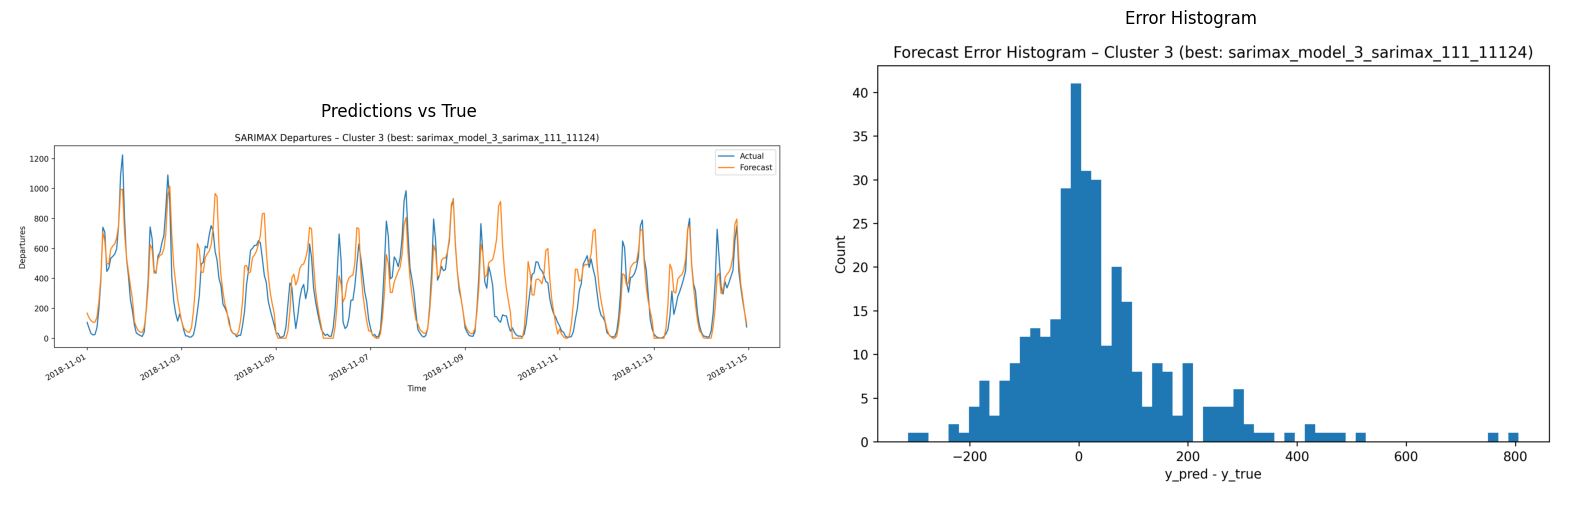

## Cluster 7

### Summary

```text
Cluster: 7
Selected model: sarimax_model_7_sarimax_111_11124
Rows (hours): 336
MAE (window): 76.777
RMSE (window): 113.687
Window: 2018-11-01 00:00:00 -> 2018-11-14 23:00:00

```

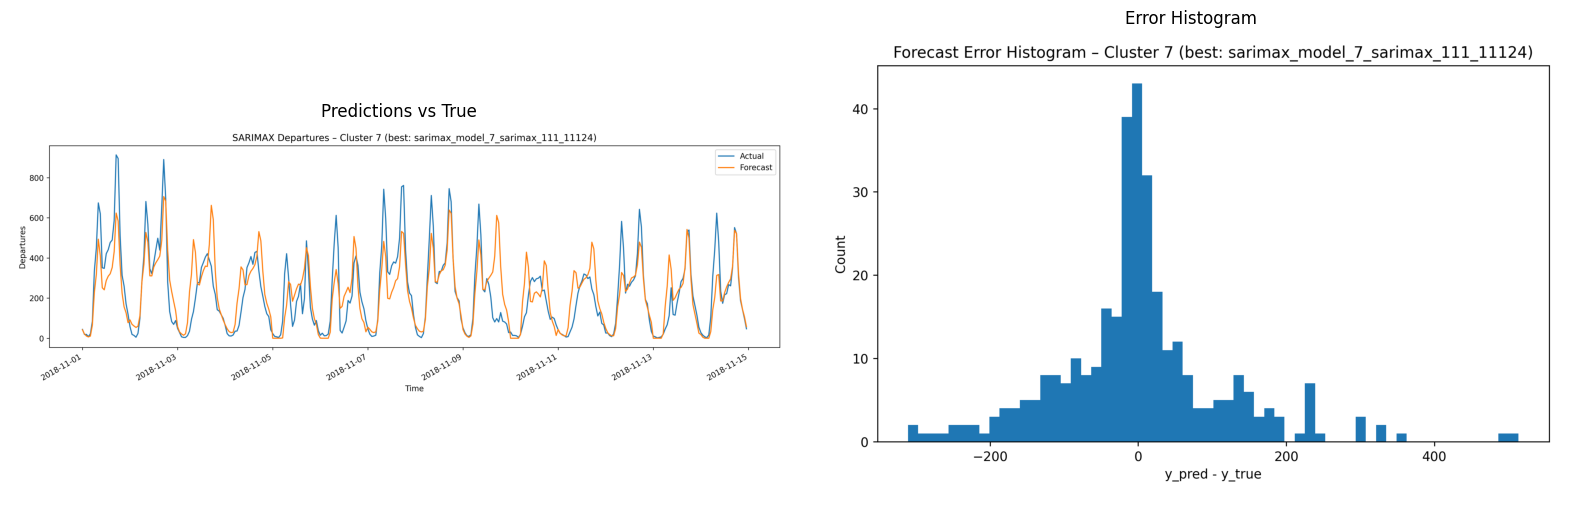

## Cluster 8

### Summary

```text
Cluster: 8
Selected model: sarimax_model_8_sarimax_111_11124
Rows (hours): 336
MAE (window): 84.918
RMSE (window): 129.104
Window: 2018-11-01 00:00:00 -> 2018-11-14 23:00:00

```

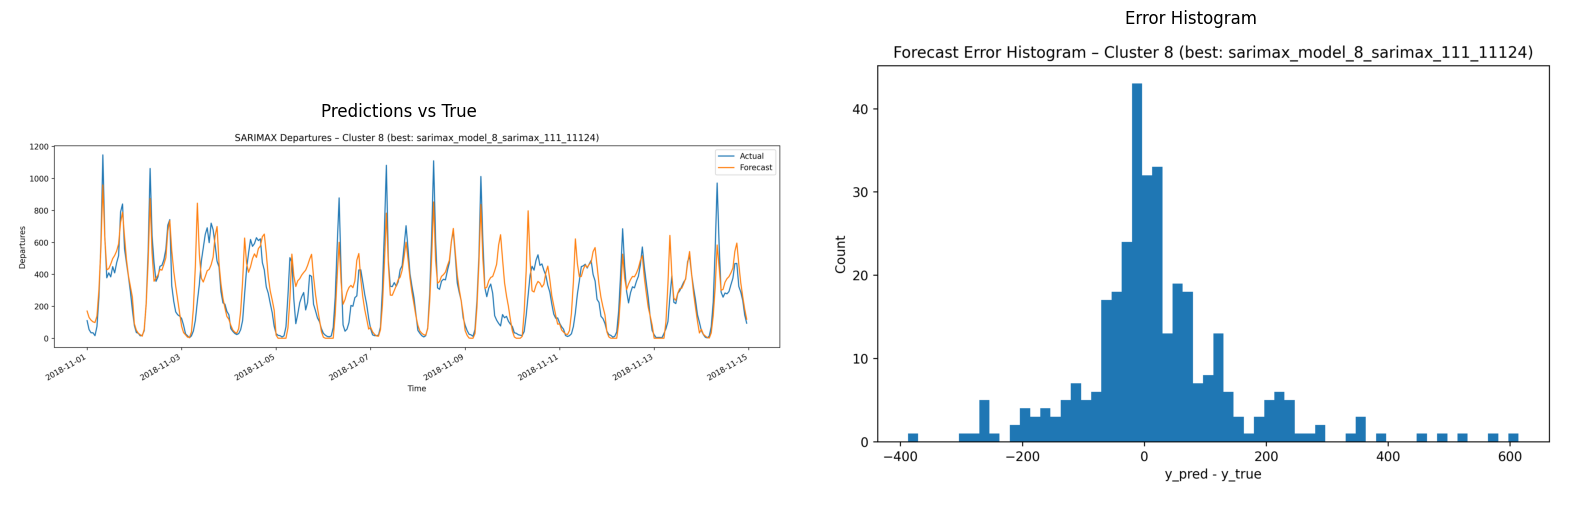

In [4]:
for cid in clusters:
    show_cluster(cid)


In [5]:
from IPython.display import HTML

items = []
for cid in clusters:
    pred_pdf = (PLOTS_DIR / f"cluster_{cid}_pred_vs_true.pdf")
    hist_pdf = (PLOTS_DIR / f"cluster_{cid}_error_hist.pdf")
    items.append(
        f"<li><b>Cluster {cid}</b> — "
        f"<a href='{pred_pdf.as_posix()}' target='_blank'>pred_vs_true.pdf</a> | "
        f"<a href='{hist_pdf.as_posix()}' target='_blank'>error_hist.pdf</a>"
        f"</li>"
    )

HTML("<ul>" + "\n".join(items) + "</ul>")
